In [28]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
np.set_printoptions(precision = 3, suppress = True)

In [29]:
# Load data
flight_data = np.genfromtxt('./files/nycflights.csv',delimiter = ",", skip_header=1)

In [30]:
print(flight_data[0])

[   1. 2013.    1.    1.  517.    2.  830.   11.   nan   nan 1545.   nan
   nan  227. 1400.    5.   17.   nan]


In [31]:
print(flight_data.shape)

(336776, 18)


In [32]:
# Get Input data for model
dep_delay = np.array([row[5] for row in flight_data])
distance = np.array([row[-3] for row in flight_data])
arr_delay = np.array([row[7] for row in flight_data])
X = np.array([dep_delay,distance,arr_delay]).T
print(X)

[[ 2.  5. 11.]
 [ 4.  5. 20.]
 [ 2.  5. 33.]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


# Cleaning data - remove NaN

In [33]:
# Có 8255 giá trị NaN trong cột dep_delay
np.sum(np.isnan(dep_delay))

8255

In [34]:
# Có 9430 giá trị NaN trong cột arr_delay
np.sum(np.isnan(arr_delay))

9430

In [35]:
#index của các giá trị NaN trong tập dep_delay
dep_delay_index = np.argwhere(np.isnan(dep_delay)).squeeze()
dep_delay_index

array([   838,    839,    840, ..., 336773, 336774, 336775], dtype=int64)

In [36]:
#index của các giá trị NaN trong tập arr_delay
arr_delay_index = np.argwhere(np.isnan(arr_delay)).squeeze()
arr_delay_index

array([   471,    477,    615, ..., 336773, 336774, 336775], dtype=int64)

In [37]:
index_nan = list(dep_delay_index) + list(arr_delay_index)
print(np.sort(index_nan).shape)
index_nan = np.unique(np.sort(index_nan))
print(np.unique(np.sort(index_nan)))

(17685,)
[   471    477    615 ... 336773 336774 336775]


In [38]:
index_nan.shape

(9430,)

In [39]:
# Remove NaN
cleaned_X = X[~np.isnan(arr_delay)]
cleaned_X

array([[  2.,   5.,  11.],
       [  4.,   5.,  20.],
       [  2.,   5.,  33.],
       ...,
       [ -5.,  22., -16.],
       [ 12.,  23.,   1.],
       [-10.,  23., -25.]])

In [40]:
data_input = cleaned_X[:,0:2]
data_input

array([[  2.,   5.],
       [  4.,   5.],
       [  2.,   5.],
       ...,
       [ -5.,  22.],
       [ 12.,  23.],
       [-10.,  23.]])

In [41]:
data_output = cleaned_X[:,2]
data_output

array([ 11.,  20.,  33., ..., -16.,   1., -25.])

In [45]:
print('Data_input:',data_input.shape)
print('Data_output:',data_output.size)

Data_input: (327346, 2)
Data_output: 327346


# # Chia dữ liệu tập train và tập test

In [46]:
# Tạo index
np.random.seed(5)
random_index = np.arange(data_output.size)
np.random.shuffle(random_index)
print(random_index)
print(random_index.shape)

[ 10161 171105 215210 ...  20463  18638 297827]
(327346,)


In [47]:
#Chia index
N_TRAIN = 300000
train_index = random_index[:N_TRAIN]
test_index = random_index[N_TRAIN:]
print(train_index.shape)
print(test_index.shape)

(300000,)
(27346,)


In [48]:
#Chia dữ liệu dựa trên 2 bộ index
x_train, y_train = data_input[train_index], data_output[train_index]
print(x_train)
print(y_train)

x_test, y_test = data_input[test_index], data_output[test_index]
print(x_test)
print(y_test)

[[ -4.  16.]
 [  3.  10.]
 [128.  21.]
 ...
 [ -2.  10.]
 [184.  23.]
 [ -5.  10.]]
[-21.   6.  89. ... -24. 158. -19.]
[[-7.  8.]
 [ 7. 15.]
 [ 2. 20.]
 ...
 [19. 18.]
 [-4. 17.]
 [-5.  6.]]
[-11.  21. -22. ... -14.  -5. -21.]


##  Tạo mô hình Linear Regression
Sử dụng lớp `LinearRegression` của thư viện `sklearn`

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
#Train model với bộ train x
model.fit(x_train,y_train)

LinearRegression()

In [52]:
# Kiểm định lại mô hình với R2
r2 = model.score(x_train,y_train)
r2

0.8368409538359806

In [58]:
#Hệ số a1 và a2 (Do data input có 2 trường là dep_delay và distance)
# Hế số a1,a2 thể hiện độ dốc
slope_a = model.coef_
slope_a

array([ 1.021, -0.049])

In [57]:
# Hế số b là điểm chặn của y
intercept = model.intercept_
intercept

-5.281095685038107

In [64]:
# Dự đoán cho giá trị x_train[0]
arr_delay_10 = model.predict([x_train[0]])[0]
print(arr_delay_10)
print(y_test[0])

-10.143984974788367
-11.0


-- Tương đối chính xác

# Đánh giá trên tập test

In [215]:
q2  = model.score(x_test, y_test)
print(q2)

0.8374348661818591


In [66]:
# Tìm độ sai số giữa tập dự đoán và tập test
y_test_hat = model.predict(x_test)
print(y_test_hat)
print(y_test_hat - y_test)
err = y_test_hat - y_test

[-12.816   1.133  -4.214 ...  13.237 -10.193 -10.677]
[ -1.816 -19.867  17.786 ...  27.237  -5.193  10.323]


In [93]:
# Phân tích err
print('Mean:',np.mean(err))
mean = np.mean(err)
print('Median:',np.median(err))
median = np.median(err)
print('Min:',np.min(err))
min_err = np.min(err)
print('Max:', np.max(err))
max_err = np.max(err)

counts,bins = np.histogram(err, bins = 100)
max_count_index = np.argmax(counts)
mode = (bins[max_count_index] + bins[max_count_index+1])/2
print('Mode:',mode)

Mean: -0.025313871749675636
Median: 1.6511748538793007
Min: -186.56634168582886
Max: 65.7877752921537
Mode: 3.9610166325479668


In [78]:
std = np.std(err)
print('std:',std)

std: 18.181785518880638


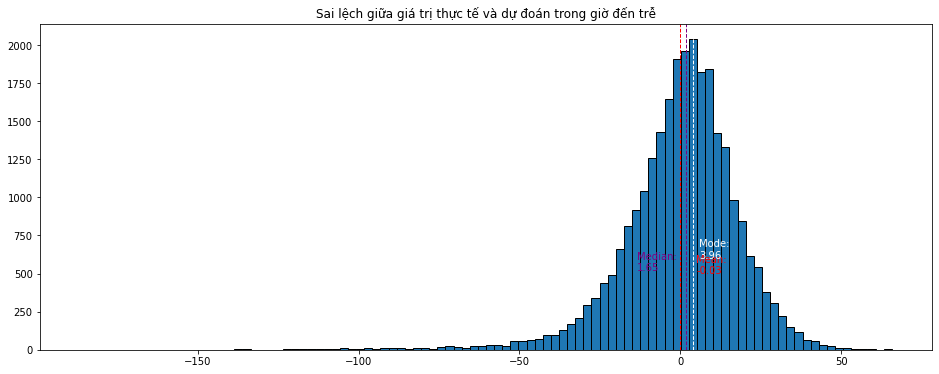

In [108]:
# Vẽ err
fig,ax = plt.subplots(figsize = (16,6))
ax.hist(err,bins=100, edgecolor="k")

ax.axvline(mean, color='red', linestyle = 'dashed', linewidth=1)
ax.text(mean + 5, 500, f"Mean:\n{mean:.2f}", color='red')

ax.axvline(mode, color='white', linestyle = 'dashed', linewidth=1)
ax.text(mode + 2, 600, f"Mode:\n{mode:.2f}", color='white')

ax.axvline(median, color='purple', linestyle = 'dashed', linewidth=1)
ax.text(median - 15, 520, f"Median:\n{median:.2f}", color='purple')

plt.title('Sai lệch giữa giá trị thực tế và dự đoán trong giờ đến trễ')
plt.show()

In [95]:
# Độ phân vị
pct = np.percentile(err,[25,75])
qnt = np.quantile(err,[0.25,0.75])
print('PCT 25% - 75%:',pct)
print('QNT 0.25 - 0.75:',qnt)

PCT 25% - 75%: [-8.782 10.898]
QNT 0.25 - 0.75: [-8.782 10.898]


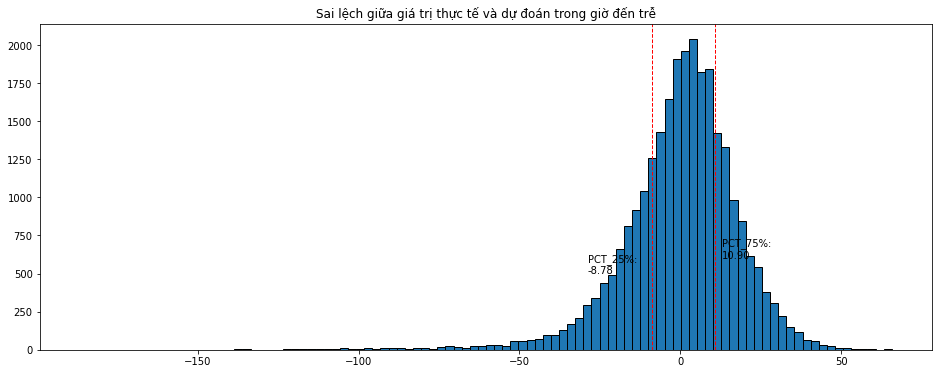

In [100]:
# Vẽ err
fig,ax = plt.subplots(figsize = (16,6))
ax.hist(err,bins=100, edgecolor="k")

ax.axvline(pct[0], color='red', linestyle = 'dashed', linewidth=1)
ax.text(pct[0] -20, 500, f"PCT_25%:\n{pct[0]:.2f}", color='black')

ax.axvline(pct[1], color='red', linestyle = 'dashed', linewidth=1)
ax.text(pct[1] + 2, 600, f"PCT_75%:\n{pct[1]:.2f}", color='black')

plt.title('Sai lệch giữa giá trị thực tế và dự đoán trong giờ đến trễ')
plt.show()

In [101]:
arr_delay_test1 = model.predict([x_test[100]]).squeeze()
print(arr_delay_test1)

-10.774912720888459


In [102]:
y_test[100]

-26.0

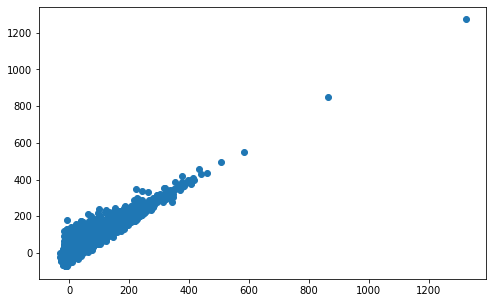

In [104]:
# vẽ scatter thời gian thực tế và thời gian dự đoán
plt.figure(figsize=(8,5))
plt.scatter(y_test_hat,y_test)
plt.show()

In [106]:
# 2 Giá trị có tương quan rất mạnh và là positive correlation
np.corrcoef(y_test_hat, y_test)

array([[1.   , 0.915],
       [0.915, 1.   ]])

 - Mô hình test có độ chính xác